In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from itertools import product

pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MBTI프로젝트/MBTI x 인테리어old.csv')
df

,타임스탬프,1. 당신의 MBTI는 무엇인가요?,2. 당신의 성별은?,3. 당신의 연령대는?,4. 당신의 직업은?,1. 혼자 여행을 가기로 해서 숙소를 잡았다. 그 숙소는?,2. 나에게 5000만원이 생겼다. 내가 투자할 주식 종목은?,3. 친구가 중요한 주식 정보를 주었다. 나의 행동은?,4. 친구가 갑자기 여행을 가자고 한다. 나의 행동은?,5. 비도 오고 마음도 우중충하고 심심하다. 그럴 때 나는?,6. 지나가는 사람이 길을 물어본다. 나의 행동은?,7. 친구가 준비한 시험에서 떨어졌다. 당신의 행동은?,8. 첫 소개팅 하는 날! 나는 무슨 옷을 입을 것인가?,9. 갑자기 번뜩이는 아이디어가 생겨났다. 언제인가?,10. 내가 생각하는 미래는?,11. 회사에 입사하게 되었을 때 내가 들어가고 싶은 팀은?,12. 여행중 계획된 장소가 아닌 장소를 지나가게 됐다. 나의 행동은?,13. 오랜만에 내가 맛있는 과자를 발견했을 때 나는?,14. 첫 회사에 출근 후 친구가 회사에 대해 물어볼 때 나는?,15. 회의 도중 의견이 다를 때 나의 행동은?,16. 맛집을 찾아서 갔는데 가게 문이 닫혀 있다 나의 행동은?,17. 친구와 약속이 갑자기 취소됐다. 그럴 때 나는?,18. 회사에서 일을 하다가 인정받았다. 그 일은?,19. 길을 가다가 애인이 얘기한 물건을 보고 사서 선물했을 때 내 모습은?,20. 팀플에서 조장이 되었을 때 나는?,1. 인테리어에 얼마나 관심이 있으신가요?,2. 당신에게 집이란?,3. 집을 볼 때 가장 중요시하는 공간은 어디인가요?,4. 가장 좋아하는 색깔톤은 무엇인가요?,5. 인테리어에서 가장 중요하다 생각하는 것은 무엇인가요?,모던,북유럽,내추럴,빈티지,프로방스 / 로맨틱,클래식 / 앤틱,한국 / 아시아,유니크,MIX
0,2021/12/07 5:29:53 오후 GMT+9,INTP,남자,20대,무직,나 혼자만의 공간인 호텔.,안전제일 삼성전자는 안 망하지!! 삼성전자!!,그 회사는 내가 모르는 회사니까 패스.,어디가는데?? 필요한 물건은?? 비용은??,아무나 불러서 술 마시고 논다.,지금 있는 곳에서 가는 법을 알려준다.,수고했다! 술이나 먹자!,이미 어제 준비해놨지!,친구들과 같이 길을 가다가.,미래를 생각하지 않으면 발전이 없다.,회사 내에서 가장 신뢰 받고 인망이 좋은 팀.,일정에 무리가 있어도 궁금하면 가본다.,"가족, 친구, 지인에게 소개한다.",전체적인 회사의 분위기를 말한다.,상대방이 기분 나쁘지 않게 돌려서 전달.,옆집도 맛있겠지 옆집으로 가자.,다른 친구를 불러서 논다.,주어진 업무를 완벽히 이행했을 때.,나는 기억력이 좋아.,조원들에게 목표를 제시하고 의견을 듣는다.,1,쉬는 공간,개인방,모노톤,가격,5,3,3,3,4,3,5,2,3
1,2021/12/07 5:33:41 오후 GMT+9,INFP,남자,20대,대학생,나 혼자만의 공간인 호텔.,조만간 자동차는 전기차로 전부 바뀔거야 테슬라!!,믿을만한 친구니까 친구따라 가즈아!,오케이! 여행은 즉흥이지!,집에서 혼술과 TV를 본다.,지금 있는 곳에서 가는 법을 알려준다.,수고했다! 술이나 먹자!,오늘은 너로 정했다! 그날 끌리는 옷!,집에서 혼자 TV를 보다가.,미래를 생각하지 않으면 발전이 없다.,"회사 내에서 성과가 좋고, 영향력이 있는 팀.",일정에 무리가 있어도 궁금하면 가본다.,그냥 나만 사서 잘 먹는다.,전체적인 회사의 분위기를 말한다.,상대방이 기분 나쁘지 않게 돌려서 전달.,옆집도 맛있겠지 옆집으로 가자.,혼자 돌아다니다 집으로 간다.,주어진 업무를 완벽히 이행했을 때.,나는 섬세한 사람이야.,조원들에게 목표를 제시하고 의견을 듣는다.,4,쉬는 공간,거실,우드톤,무드,5,4,3,1,1,2,3,1,4
2,2021/12/07 5:33:52 오후 GMT+9,ISTP,남자,20대,대학생,나 혼자만의 공간인 호텔.,조만간 자동차는 전기차로 전부 바뀔거야 테슬라!!,믿을만한 친구니까 친구따라 가즈아!,오케이! 여행은 즉흥이지!,아무나 불러서 술 마시고 논다.,지금 있는 곳에서 가는 법을 알려준다.,수고했다! 술이나 먹자!,오늘은 너로 정했다! 그날 끌리는 옷!,친구들과 같이 길을 가다가.,현재가 없으면 미래가 없다.,"회사 내에서 성과가 좋고, 영향력이 있는 팀.",일정에 무리가 있어도 궁금하면 가본다.,"가족, 친구, 지인에게 소개한다.",전체적인 회사의 분위기를 말한다.,나의 생각과 논리가 맞다는 것을 우선적으로 증명.,아 열받어…. 그냥 아무데나 가자.,혼자 돌아다니다 집으로 간다.,주어진 업무를 완벽히 이행했을 때.,나는 섬세한 사람이야.,각자 어떤 일을 해야할 지 구체적으로 정해준다.,5,쉬는 공간,개인방,모노톤,무드,5,4,3,1,1,1,3,1,4
3,2021/12/07 5:35:05 오후 GMT+9,INFJ,남자,20대,무직,나 혼자만의 공간인 호텔.,안전제일 삼성전자는 안 망하지!! 삼성전자!!,믿을만한 친구니까 친구따라 가즈아!,어디가는데?? 필요한 물건은?? 비용은??,집에서 혼술과 TV를 본다.,근처에 알만한 건물을 기준으로 설명한다.,수고했다! 술이나 먹자!,이미 어제 준비해놨지!,집에서 혼자 TV를 보다가.,미래를 생각하지 않으면 발전이 없다.,회사 내에서 가장 신뢰 받고 인망이 좋은 팀.,일정에 무리가 있으면 포기하고 일정대로 행동한다.,"가족, 친구, 지인에게 소개한다.",구체적으로 오늘 있었던 일들을 나열한다.,상대방이 기분 나쁘지 않게 돌려서 전달.,아 열받어…. 그냥 아무데나 가자.,혼자 돌아다니다 집으로 간다.,주어진 업무를 완벽히 이행했을 때.,나는 섬세한 사람이야.,조원들에게 목표를 제시하고 의견을 듣는다.,4,쉬는 공간,개인방,우드톤,디자인,5,3,4,1,1,1,5,1,2
4,2021/12/07 5:35:53 오후 GMT+9,ESTP,남자,20대,무직,나 혼자만의 공간인 호텔.,조만간 자동차는 전기차로 전부 바뀔거야 테슬라!!,그 회사는 내가 모르는 회사니까 패스.,오케이! 여행은 즉흥이지!,아무나 불러서 술 마시고 논다.,지금 있는 곳에서 가는 법을 알려준다.,왜?? 무슨 문제있었어? 컨디션이 별로였나보네...,이미 어제 준비해놨지!,친구들과 같이 길을 가다가.,현재가 없으면 미래가 없다.,회사 내에서 가장 신뢰 받고 인망이 좋은 팀.,일정에 무리가 있어도 궁금하면 가본다.,"가족, 친구, 지인에게 소개한다.",구체적으로 오늘 있었던 일들을 나열한다.,나의 생각과 논리가 맞다는 것을 우선적으로 증명.,아 열받어…. 그냥 아무데나 가자.,다른 친구를 불러서 논다.,새로운 아이디어를 냈을 때.,나는 섬세한 사람이야.,조원들에게 목표를 제시하고 의견을 듣는다.,5,쉬는 공간,거실,우드톤,무드,5,3,4,1,2,1,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,2021/12/15 12:32:02 오후 GMT+9,ISTP,여자,20대,대학생,나 혼자만의 공간인 호텔.,안전제일 삼성전자는 안 망하지!! 삼성전자!!,믿을만한 친구니까 친구따라 가즈아!,어디가는데?? 필요한 물건은?? 비용은??,집에서 혼술과 TV를 본다.,지금 있는 곳에서 가는 법을 알려준다.,왜?? 무슨 문제있었어? 컨디션이 별로였나보네...,이미 어제 준비해놨지!,친구들과 같이 길을 가다가.,현재가 없으면 미래가 없다.,"회사 내에서 성과가 좋고, 영향력이 있는 팀.",일정에 무리가 있으면 포기하고 일정대로 행동한다.,그냥 나만 사서 잘 먹는다.,구체적으로 오늘 있었던 일들을 나열한다.,나의 생각과 논리가 맞다는 것을 우선적으로 증명.,아 열받어…. 그냥 아무데나 가자.,혼자 돌아다니다 집으로 간다.,주어진 업무를 완벽히 이행했을 때.,나는 기억력이 좋아.,각자 어떤 일을 해야할 지 구체적으로 정해준다.,2,쉬는 공간,개인방,모노톤,디자인,5,3,2,1,3,2,2,3,2
570,2021/12/15 12:56:17 오후 GMT+9,ISTP,남자,20대,직장인,나 혼자만의 공간인 호텔.,조만간 

In [4]:
# mbti 20개 질문, 답변 변환

# e / s / f / j = +1 => "양수"
# i / n / t / p = -1 => "음수"

# labeling import
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# 20문항 따로 데이터프레임
quiz_df = df.iloc[:, 5:25]
quiz_df.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

# labeling 
for i in range(1, 21):
    quiz = quiz_df[i]
    encoder.fit(quiz)
    quiz2 = encoder.transform(quiz)
    quiz_df[i] = quiz2
    
# +1: 1인 컬럼값들을 +1로, 0인 컬럼값들을 -1로
for i in [1, 9, 6, 10, 18, 3, 15, 19, 8, 12]:
    quiz_df[i][quiz_df[i].values == 1] = 1
    quiz_df[i][quiz_df[i].values == 0] = -1

# -1: 1인 컬럼값들을 -1로, 0인 컬럼값들을 +1로
for j in [5, 13, 17, 2, 14, 7, 11, 4, 16, 20]:
    quiz_df[j][quiz_df[j].values == 1] = -1
    quiz_df[j][quiz_df[j].values == 0] = 1
    
# MBTI: '모름'의 EI, SN, FT, JP 파악 (양수 or 음수)
quiz_df['EI'] = 0
quiz_df['SN'] = 0
quiz_df['FT'] = 0
quiz_df['JP'] = 0

for i in range(1, 21):
    if i % 4 == 1:
        quiz_df['EI'] += quiz_df[i]
    elif i % 4 == 2:
        quiz_df['SN'] += quiz_df[i]
    elif i % 4 == 3:
        quiz_df['FT'] += quiz_df[i]
    elif i % 4 == 0:
        quiz_df['JP'] += quiz_df[i]

nombti = quiz_df.loc[:, 'EI':'JP']
nombti

,EI,SN,FT,JP
0,3,1,1,-1
1,-5,-1,3,-5
2,1,1,1,-1
3,-3,1,5,3
4,3,1,-1,-1
...,...,...,...,...
569,-3,5,-3,5
570,-5,3,-1,3
571,-5,-1,-3,-1
572,-3,-1,1,1


In [5]:
quiz_df2 = quiz_df.iloc[:,:20]

In [6]:
# 혹시 모를 상황 대비 copy
nombti2 = nombti.copy()

# # EI, SN, FT, JP 계산값들 str으로
for i in range(len(nombti2.index)):
    for j in ['EI','SN','FT','JP']:
        if nombti2.loc[i, j] > 0:
            if j == 'EI':
                nombti2.loc[i, j] = 'E'
            elif j == 'SN':
                nombti2.loc[i, j] = 'S'
            elif j == 'FT':
                nombti2.loc[i,j] = 'F'
            elif j == 'JP':
                nombti2.loc[i, 'JP'] = 'J'
        else:
            if j == 'EI':
                nombti2.loc[i, j] = 'I'
            elif j == 'SN':
                nombti2.loc[i, j] = 'N'
            elif j == 'FT':
                nombti2.loc[i,j] = 'T'
            elif j == 'JP':
                nombti2.loc[i, 'JP'] = 'P'

# 앞쪽 컬럼값들(str) 더해서 mbti 판단
nombti2['mbti_guess'] = nombti2.iloc[:, 0] + nombti2.iloc[:, 1] + nombti2.iloc[:, 2] + nombti2.iloc[:, 3]
nombti2

,EI,SN,FT,JP,mbti_guess
0,E,S,F,P,ESFP
1,I,N,F,P,INFP
2,E,S,F,P,ESFP
3,I,S,F,J,ISFJ
4,E,S,T,P,ESTP
...,...,...,...,...,...
569,I,S,T,J,ISTJ
570,I,S,T,J,ISTJ
571,I,N,T,P,INTP
572,I,N,F,J,INFJ


In [7]:
mbti_df = df.rename(columns={'1. 당신의 MBTI는 무엇인가요?':'mbti',
                             '2. 당신의 성별은?':'sex',
                             '3. 당신의 연령대는?':'age',
                             '4. 당신의 직업은?':'job',
                             '1. 인테리어에 얼마나 관심이 있으신가요?':'like',
                             '3. 집을 볼 때 가장 중요시하는 공간은 어디인가요?':'space',
                             '4. 가장 좋아하는 색깔톤은 무엇인가요?':'color',
                             '5. 인테리어에서 가장 중요하다 생각하는 것은 무엇인가요?':'miv',
                             '모던':'modern',
                             '북유럽': 'nor_eur', 
                             '내추럴': 'natural', 
                             '빈티지': 'vintage', 
                             '프로방스 / 로맨틱': 'provence', 
                             '클래식 / 앤틱': 'classic', 
                             '한국 / 아시아': 'asia', 
                             '유니크': 'unique', 
                             'MIX': 'mix'})

## 직업 기타 답변 처리
# job = ['미성년자', '대학생', '직장인', '프리랜서', '사업가', '전업주부', '무직']
mbti_df.job.replace(['ㅅㄱ', '공시생', '군인', '무직', '사회복무요원', '취준', '취준생', '퇴직자'], '무직', inplace=True)
mbti_df.job.replace(['애견유치원선생', '유통업', '의료인', '전문직', '직장인'], '직장인', inplace=True)
mbti_df.job.replace(['대학생', '대학원생', '대학 휴학 군 복무중'], '대학생', inplace=True)
mbti_df.job.replace(['중고등학생'], '미성년자', inplace=True)

## one-hot encoding
color = pd.get_dummies(mbti_df['color'])
sex = pd.get_dummies(mbti_df['sex'])
age = pd.get_dummies(mbti_df['age'])
job = pd.get_dummies(mbti_df['job'])

## 필요없는, 원핫인코딩된, mbti 질문 columns 삭제
del(mbti_df['miv'])
del(mbti_df['color'])
del(mbti_df['space'])
del(mbti_df['타임스탬프'])
del(mbti_df['2. 당신에게 집이란?'])
del(mbti_df['sex'])
del(mbti_df['age'])
del(mbti_df['job'])
mbti_df = mbti_df.drop(columns = mbti_df.loc[:, '1. 혼자 여행을 가기로 해서 숙소를 잡았다. 그 숙소는?':'20. 팀플에서 조장이 되었을 때 나는?'])
mbti_df = pd.concat([mbti_df, color, sex, age, job, nombti2],axis=1)

## mbti모르는 사람들의 mbti 추가해서 최종 mbti column 생성
mbti_df['real_mbti'] = mbti_df['mbti']
mbti_df['real_mbti'][mbti_df['real_mbti']=='모름'] = mbti_df['mbti_guess']

mbti_df['real_EI'] = ''
mbti_df['real_SN'] = ''
mbti_df['real_FT'] = ''
mbti_df['real_JP'] = ''

for i in range(len(mbti_df.index)):
    mbti_df['real_EI'][i] = mbti_df['real_mbti'].values[i][0]
    mbti_df['real_SN'][i] = mbti_df['real_mbti'].values[i][1]
    mbti_df['real_FT'][i] = mbti_df['real_mbti'].values[i][2]
    mbti_df['real_JP'][i] = mbti_df['real_mbti'].values[i][3]

## 불필요한 columns 삭제
del(mbti_df['mbti_guess'])
del(mbti_df['EI'])
del(mbti_df['SN'])
del(mbti_df['FT'])
del(mbti_df['JP'])

## mbti 8개 원핫인코딩
ei = pd.get_dummies(mbti_df['real_EI'])
sn = pd.get_dummies(mbti_df['real_SN'])
ft = pd.get_dummies(mbti_df['real_FT'])
jp = pd.get_dummies(mbti_df['real_JP'])

mbti_df = pd.concat([mbti_df, ei, sn, ft, jp], axis=1)
    
pd.options.display.max_columns = None  

display(mbti_df)

,mbti,like,modern,nor_eur,natural,vintage,provence,classic,asia,unique,mix,모노톤,우드톤,웜톤,쿨톤,파스텔톤,남자,여자,10대,20대,30대,40대,50대,60대 이상,대학생,무직,미성년자,사업가,전업주부,직장인,프리랜서,real_mbti,real_EI,real_SN,real_FT,real_JP,E,I,N,S,F,T,J,P
0,INTP,1,5,3,3,3,4,3,5,2,3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,INTP,I,N,T,P,0,1,1,0,0,1,0,1
1,INFP,4,5,4,3,1,1,2,3,1,4,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,INFP,I,N,F,P,0,1,1,0,1,0,0,1
2,ISTP,5,5,4,3,1,1,1,3,1,4,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1
3,INFJ,4,5,3,4,1,1,1,5,1,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,INFJ,I,N,F,J,0,1,1,0,1,0,1,0
4,ESTP,5,5,3,4,1,2,1,4,1,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,ESTP,E,S,T,P,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,ISTP,2,5,3,2,1,3,2,2,3,2,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1
570,ISTP,1,4,4,4,4,3,4,3,2,3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1
571,INTP,3,4,3,3,4,4,5,5,2,2,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,INTP,I,N,T,P,0,1,1,0,0,1,0,1
572,ISTP,4,5,2,2,1,2,3,4,4,3,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1


In [184]:
# df_space = mbti_df['space']
# q = ['개인방','거실','부엌','드레스룸','서재','화장실']
# for i in range(len(df_space)):
#     if df_space[i] not in q:
#         df_space[i] = '기타s'


In [185]:
# df_miv= mbti_df['miv']
# q2 = ['디자인','무드','기능','브랜드','가격']
# for i in range(len(df_miv)):
#     if df_miv[i] not in q2:
#         df_miv[i] = '기타m'

In [186]:
# mbti_df['space'] = df_space
# mbti_df['miv'] = df_miv


In [ ]:
# df2 = pd.get_dummies(mbti_df['color'])
# df3 = pd.get_dummies(mbti_df['sex'])
# df4 = pd.get_dummies(mbti_df['age'])
# df5 = pd.get_dummies(mbti_df['space'])
# df6 = pd.get_dummies(mbti_df['miv'])

# del(mbti_df['miv'])
# del(mbti_df['color'])
# del(mbti_df['space'])
# del(mbti_df['타임스탬프'])
# del(mbti_df['2. 당신에게 집이란?'])
# del(mbti_df['sex'])
# del(mbti_df['age'])
# mbti_df = mbti_df.drop(columns = mbti_df.loc[:, '1. 혼자 여행을 가기로 해서 숙소를 잡았다. 그 숙소는?':'20. 팀플에서 조장이 되었을 때 나는?'])
# mbti_df = pd.concat([mbti_df,df2,df3,df4,df5,df6,nombti2],axis=1)
# # mbti_df = pd.concat([mbti_df,nombti2],axis=1)
# # mbti_df2 = pd.concat([mbti_df, quiz_df2], axis=1)


# mbti_df['real_mbti'] = mbti_df['mbti']
# mbti_df['real_mbti'][mbti_df['real_mbti']=='모름'] = mbti_df['mbti_guess']

# mbti_df['real_EI'] = ''
# mbti_df['real_SN'] = ''
# mbti_df['real_FT'] = ''
# mbti_df['real_JP'] = ''

# for i in range(len(mbti_df.index)):
#     mbti_df['real_EI'][i] = mbti_df['real_mbti'].values[i][0]
#     mbti_df['real_SN'][i] = mbti_df['real_mbti'].values[i][1]
#     mbti_df['real_FT'][i] = mbti_df['real_mbti'].values[i][2]
#     mbti_df['real_JP'][i] = mbti_df['real_mbti'].values[i][3]

# pd.options.display.max_columns = None  

# # display(mbti_df)

In [8]:
mbti_df2 = mbti_df.copy()
mbti_df2

,mbti,like,modern,nor_eur,natural,vintage,provence,classic,asia,unique,mix,모노톤,우드톤,웜톤,쿨톤,파스텔톤,남자,여자,10대,20대,30대,40대,50대,60대 이상,대학생,무직,미성년자,사업가,전업주부,직장인,프리랜서,real_mbti,real_EI,real_SN,real_FT,real_JP,E,I,N,S,F,T,J,P
0,INTP,1,5,3,3,3,4,3,5,2,3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,INTP,I,N,T,P,0,1,1,0,0,1,0,1
1,INFP,4,5,4,3,1,1,2,3,1,4,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,INFP,I,N,F,P,0,1,1,0,1,0,0,1
2,ISTP,5,5,4,3,1,1,1,3,1,4,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1
3,INFJ,4,5,3,4,1,1,1,5,1,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,INFJ,I,N,F,J,0,1,1,0,1,0,1,0
4,ESTP,5,5,3,4,1,2,1,4,1,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,ESTP,E,S,T,P,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,ISTP,2,5,3,2,1,3,2,2,3,2,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1
570,ISTP,1,4,4,4,4,3,4,3,2,3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1
571,INTP,3,4,3,3,4,4,5,5,2,2,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,INTP,I,N,T,P,0,1,1,0,0,1,0,1
572,ISTP,4,5,2,2,1,2,3,4,4,3,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1


In [176]:
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()

# for i in dddd.columns:
#   data = dddd[i]
#   encoder.fit(data)
#   dddd[i] = encoder.transform(data)

# dddd['home'] = dddd['2. 당신에게 집이란?']
# del dddd['2. 당신에게 집이란?']
# dddd

,sex,age,job,like,space,color,miv,real_mbti,home
0,0,1,6,0,0,0,0,11,25
1,0,1,4,3,1,1,4,9,25
2,0,1,4,4,0,0,4,15,25
3,0,1,6,3,0,1,3,8,25
4,0,1,6,4,1,1,4,7,25
...,...,...,...,...,...,...,...,...,...
569,1,1,4,1,0,0,3,15,25
570,0,1,15,0,1,1,1,15,25
571,0,1,4,2,0,2,1,11,25
572,1,1,15,3,1,0,4,15,25


In [178]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif = pd.DataFrame()
# vif['VIF Factor'] = [variance_inflation_factor(dddd.values, i) for i in range(dddd.shape[1])]
# vif['features'] = dddd.columns
# vif.round(1)

,VIF Factor,features
0,1.8,sex
1,3.3,age
2,4.4,job
3,5.3,like
4,1.4,space
5,1.9,color
6,5.5,miv
7,4.1,real_mbti
8,8.6,home


In [9]:
# like_mbti라는 새로운 데이터프레임 생성 (좋아하거나 싫어하는 무드를 모아놓은 데이터프레임)
like_mbti_mbti= ['ENFJ','ENFP','ENTJ','ENTP','ESFJ','ESFP','ESTJ','ESTP','INFJ','INFP','INTJ','INTP','ISFJ','ISFP','ISTJ','ISTP']
like_mbti = pd.DataFrame({'mbti':like_mbti_mbti})

In [10]:
like_mbti.set_index('mbti',inplace=True)

In [11]:
# modern	nor_eur	natural	vintage	provence	classic	asia	unique	mix
moods = ['modern','nor_eur','natural','vintage','provence','classic','asia','unique','mix']
for mood in moods:
    like_mbti[mood+'_like'] = 0
    like_mbti[mood+'_hate'] = 0
like_mbti

,modern_like,modern_hate,nor_eur_like,nor_eur_hate,natural_like,natural_hate,vintage_like,vintage_hate,provence_like,provence_hate,classic_like,classic_hate,asia_like,asia_hate,unique_like,unique_hate,mix_like,mix_hate
mbti,,,,,,,,,,,,,,,,,,
ENFJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENFP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENTJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENTP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ESFJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ESFP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ESTJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ESTP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
INFJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 성향 두개씩

In [12]:
# 성향 4개 항목 2개 조합
personality_2ea = []

# mbti 성향 4개
personality = [['E', 'I'], ['S', 'N'], ['F', 'T'], ['J', 'P']]

for i in list(combinations(personality, 2)): # 항목 4개중 2개 선택 (4C2)
    for j in list(product(*i)): # 2개 선택한 것들에서 2개 중 1개씩 선택 (2C1 x 2C1)
        personality_2ea.append(str(j[0] + j[1])) # str으로 바꿔서 리스트로
personality_2ea = np.array(personality_2ea).astype('object')
personality_2ea

array(['ES', 'EN', 'IS', 'IN', 'EF', 'ET', 'IF', 'IT', 'EJ', 'EP', 'IJ',
       'IP', 'SF', 'ST', 'NF', 'NT', 'SJ', 'SP', 'NJ', 'NP', 'FJ', 'FP',
       'TJ', 'TP'], dtype=object)

In [13]:
df2 = mbti_df.copy()
df2 = df2[['real_mbti', 'real_EI', 'real_SN', 'real_FT', 'real_JP']]
df2[personality_2ea] = 0
df2

,real_mbti,real_EI,real_SN,real_FT,real_JP,ES,EN,IS,IN,EF,ET,IF,IT,EJ,EP,IJ,IP,SF,ST,NF,NT,SJ,SP,NJ,NP,FJ,FP,TJ,TP
0,INTP,I,N,T,P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,INFP,I,N,F,P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ISTP,I,S,T,P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,INFJ,I,N,F,J,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ESTP,E,S,T,P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,ISTP,I,S,T,P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
570,ISTP,I,S,T,P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
571,INTP,I,N,T,P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
572,ISTP,I,S,T,P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
for i in range(len(df2.index)):
    mbli1 = []
    for j in df2.loc[i, "real_EI":"real_JP"]:
        mbli1.append(j)
    mbli1 = list(combinations(mbli1, 2))
    mbli2 = []
    for k in mbli1:
        mbli2.append(k[0]+k[1])
    for col in df2.columns:
        if col in mbli2:
            df2.loc[i, (col)] = 1
df2

,real_mbti,real_EI,real_SN,real_FT,real_JP,ES,EN,IS,IN,EF,ET,IF,IT,EJ,EP,IJ,IP,SF,ST,NF,NT,SJ,SP,NJ,NP,FJ,FP,TJ,TP
0,INTP,I,N,T,P,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,INFP,I,N,F,P,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
2,ISTP,I,S,T,P,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
3,INFJ,I,N,F,J,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
4,ESTP,E,S,T,P,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,ISTP,I,S,T,P,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
570,ISTP,I,S,T,P,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
571,INTP,I,N,T,P,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
572,ISTP,I,S,T,P,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1


In [15]:
mbti_df[personality_2ea] = df2.iloc[:, 5:]
mbti_df

,mbti,like,modern,nor_eur,natural,vintage,provence,classic,asia,unique,mix,모노톤,우드톤,웜톤,쿨톤,파스텔톤,남자,여자,10대,20대,30대,40대,50대,60대 이상,대학생,무직,미성년자,사업가,전업주부,직장인,프리랜서,real_mbti,real_EI,real_SN,real_FT,real_JP,E,I,N,S,F,T,J,P,ES,EN,IS,IN,EF,ET,IF,IT,EJ,EP,IJ,IP,SF,ST,NF,NT,SJ,SP,NJ,NP,FJ,FP,TJ,TP
0,INTP,1,5,3,3,3,4,3,5,2,3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,INTP,I,N,T,P,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,INFP,4,5,4,3,1,1,2,3,1,4,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,INFP,I,N,F,P,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
2,ISTP,5,5,4,3,1,1,1,3,1,4,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
3,INFJ,4,5,3,4,1,1,1,5,1,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,INFJ,I,N,F,J,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
4,ESTP,5,5,3,4,1,2,1,4,1,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,ESTP,E,S,T,P,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,ISTP,2,5,3,2,1,3,2,2,3,2,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
570,ISTP,1,4,4,4,4,3,4,3,2,3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
571,INTP,3,4,3,3,4,4,5,5,2,2,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,INTP,I,N,T,P,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
572,ISTP,4,5,2,2,1,2,3,4,4,3,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1


In [20]:

#like	modern	nor_eur	natural	vintage	provence	classic	asia	unique	mix	
#모노톤	우드톤	웜톤	쿨톤	파스텔톤	남자	여자	10대	20대	30대	40대	50대	60대 이상	
#개인방	거실	기타s	드레스룸	부엌	서재	화장실	가격	기능	기타m	디자인	무드	브랜드

## ML

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [22]:
# 1.1 Target: Real_MBTI, Guess_MBTI

In [17]:
mbti_df

,mbti,like,modern,nor_eur,natural,vintage,provence,classic,asia,unique,mix,모노톤,우드톤,웜톤,쿨톤,파스텔톤,남자,여자,10대,20대,30대,40대,50대,60대 이상,대학생,무직,미성년자,사업가,전업주부,직장인,프리랜서,real_mbti,real_EI,real_SN,real_FT,real_JP,E,I,N,S,F,T,J,P,ES,EN,IS,IN,EF,ET,IF,IT,EJ,EP,IJ,IP,SF,ST,NF,NT,SJ,SP,NJ,NP,FJ,FP,TJ,TP
0,INTP,1,5,3,3,3,4,3,5,2,3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,INTP,I,N,T,P,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,INFP,4,5,4,3,1,1,2,3,1,4,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,INFP,I,N,F,P,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
2,ISTP,5,5,4,3,1,1,1,3,1,4,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
3,INFJ,4,5,3,4,1,1,1,5,1,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,INFJ,I,N,F,J,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
4,ESTP,5,5,3,4,1,2,1,4,1,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,ESTP,E,S,T,P,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,ISTP,2,5,3,2,1,3,2,2,3,2,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
570,ISTP,1,4,4,4,4,3,4,3,2,3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
571,INTP,3,4,3,3,4,4,5,5,2,2,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,INTP,I,N,T,P,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
572,ISTP,4,5,2,2,1,2,3,4,4,3,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1


In [18]:
#### T: Real_MBTI
x_data = pd.concat([mbti_df.loc[:,'like':'프리랜서'], job],axis=1)
y_data = mbti_df['real_mbti']

x_train, x_test, y_train, y_test = train_test_split(
        x_data, # 문제 데이터
        y_data, # 답 데이터
        test_size =0.2, # 비율
        shuffle = True, # 셔플링 여부
        random_state = 20 # 시드값
  )

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()
knn = KNeighborsClassifier()
svm_svc = SVC()

clf_list = [dt_clf, rf_clf, lr_clf, knn, svm_svc]

print('+++++++++++++++++++++++++++++','+++++++++++++++++++++++++++',"의 교차검증")
def callKFold_all(clf_list):
    for clf in clf_list:
        scores = cross_val_score(clf, x_train, y_train, cv=5)
        for iter_count, accuracy in enumerate(scores):
            print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

        print(clf,"평균 정확도: {0:.4f}".format(np.mean(scores)))
        
first_result = callKFold_all(clf_list)
first_result

+++++++++++++++++++++++++++++ +++++++++++++++++++++++++++ 의 교차검증
교차 검증 0 정확도: 0.0543
교차 검증 1 정확도: 0.1087
교차 검증 2 정확도: 0.0978
교차 검증 3 정확도: 0.1522
교차 검증 4 정확도: 0.0879
DecisionTreeClassifier(random_state=11) 평균 정확도: 0.1002
교차 검증 0 정확도: 0.0652
교차 검증 1 정확도: 0.1522
교차 검증 2 정확도: 0.1304
교차 검증 3 정확도: 0.1413
교차 검증 4 정확도: 0.0220
RandomForestClassifier(random_state=11) 평균 정확도: 0.1022
교차 검증 0 정확도: 0.1413
교차 검증 1 정확도: 0.1087
교차 검증 2 정확도: 0.1087
교차 검증 3 정확도: 0.1196
교차 검증 4 정확도: 0.0879
LogisticRegression() 평균 정확도: 0.1132
교차 검증 0 정확도: 0.0435
교차 검증 1 정확도: 0.0870
교차 검증 2 정확도: 0.1196
교차 검증 3 정확도: 0.1196
교차 검증 4 정확도: 0.0659
KNeighborsClassifier() 평균 정확도: 0.0871
교차 검증 0 정확도: 0.1196
교차 검증 1 정확도: 0.1196
교차 검증 2 정확도: 0.1304
교차 검증 3 정확도: 0.1304
교차 검증 4 정확도: 0.1429
SVC() 평균 정확도: 0.1286


In [29]:
x_data = pd.concat([mbti_df.loc[:,'like':'프리랜서'], job],axis=1)
y_data = mbti_df['mbti_guess']

x_train, x_test, y_train, y_test = train_test_split(
        x_data, # 문제 데이터
        y_data, # 답 데이터
        test_size =0.2, # 비율
        shuffle = True, # 셔플링 여부
        random_state = 20 # 시드값
  )

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()
knn = KNeighborsClassifier()
svm_svc = SVC()

clf_list = [dt_clf, rf_clf, lr_clf, knn, svm_svc]

print('+++++++++++++++++++++++++++++','+++++++++++++++++++++++++++',"의 교차검증")
def callKFold_all(clf_list):
    for clf in clf_list:
        scores = cross_val_score(clf, x_train, y_train, cv=5)
        for iter_count, accuracy in enumerate(scores):
            print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

        print(clf,"평균 정확도: {0:.4f}".format(np.mean(scores)))
        
first_result = callKFold_all(clf_list)
first_result

+++++++++++++++++++++++++++++ +++++++++++++++++++++++++++ 의 교차검증
교차 검증 0 정확도: 0.0543
교차 검증 1 정확도: 0.1087
교차 검증 2 정확도: 0.0652
교차 검증 3 정확도: 0.0761
교차 검증 4 정확도: 0.1209
DecisionTreeClassifier(random_state=11) 평균 정확도: 0.0850
교차 검증 0 정확도: 0.0870
교차 검증 1 정확도: 0.0870
교차 검증 2 정확도: 0.0978
교차 검증 3 정확도: 0.0978
교차 검증 4 정확도: 0.1209
RandomForestClassifier(random_state=11) 평균 정확도: 0.0981
교차 검증 0 정확도: 0.1087
교차 검증 1 정확도: 0.1196
교차 검증 2 정확도: 0.0870
교차 검증 3 정확도: 0.0326
교차 검증 4 정확도: 0.1099
LogisticRegression() 평균 정확도: 0.0915
교차 검증 0 정확도: 0.0978
교차 검증 1 정확도: 0.1196
교차 검증 2 정확도: 0.0870
교차 검증 3 정확도: 0.0435
교차 검증 4 정확도: 0.0769
KNeighborsClassifier() 평균 정확도: 0.0849
교차 검증 0 정확도: 0.1087
교차 검증 1 정확도: 0.0870
교차 검증 2 정확도: 0.0978
교차 검증 3 정확도: 0.0761
교차 검증 4 정확도: 0.1209
SVC() 평균 정확도: 0.0981


### 1. Target : EI, SN, FT, JP

In [30]:
#### Target : real_EI
moodss = ['real_EI','real_SN','real_FT','real_JP']

for i in moodss:
    x_data = pd.concat([mbti_df.loc[:,'like':'프리랜서'], job],axis=1)
    y_data = mbti_df[i]


    x_train, x_test, y_train, y_test = train_test_split(
        x_data, # 문제 데이터
        y_data, # 답 데이터
        test_size =0.2, # 비율
        shuffle = True, # 셔플링 여부
        random_state = 20 # 시드값
    )

    # !pip install catboost
    # from catboost import CatBoostClassifier

    dt_clf = DecisionTreeClassifier(random_state=11)
    rf_clf = RandomForestClassifier(random_state=11)
    lr_clf = LogisticRegression()
    knn = KNeighborsClassifier()
    svm_svc = SVC()

    # cat_clf = CatBoostClassifier(task_type="GPU")


    clf_list = [dt_clf, rf_clf, lr_clf, knn, svm_svc]
    # clf_list = [cat_clf]
    print('+++++++++++++++++++++++++++++',i,'+++++++++++++++++++++++++++',"의 교차검증")
    def callKFold_all(clf_list):
        for clf in clf_list:
            scores = cross_val_score(clf, x_train, y_train, cv=5)
            for iter_count, accuracy in enumerate(scores):
                print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

            print(clf,"평균 정확도: {0:.4f}".format(np.mean(scores)))
        
    first_result = callKFold_all(clf_list)
    first_result

+++++++++++++++++++++++++++++ real_EI +++++++++++++++++++++++++++ 의 교차검증
교차 검증 0 정확도: 0.5326
교차 검증 1 정확도: 0.6304
교차 검증 2 정확도: 0.6304
교차 검증 3 정확도: 0.5435
교차 검증 4 정확도: 0.5055
DecisionTreeClassifier(random_state=11) 평균 정확도: 0.5685
교차 검증 0 정확도: 0.5870
교차 검증 1 정확도: 0.6413
교차 검증 2 정확도: 0.6630
교차 검증 3 정확도: 0.6413
교차 검증 4 정확도: 0.6044
RandomForestClassifier(random_state=11) 평균 정확도: 0.6274
교차 검증 0 정확도: 0.6196
교차 검증 1 정확도: 0.6304
교차 검증 2 정확도: 0.6087
교차 검증 3 정확도: 0.6304
교차 검증 4 정확도: 0.5934
LogisticRegression() 평균 정확도: 0.6165
교차 검증 0 정확도: 0.5109
교차 검증 1 정확도: 0.5761
교차 검증 2 정확도: 0.6304
교차 검증 3 정확도: 0.5761
교차 검증 4 정확도: 0.5714
KNeighborsClassifier() 평균 정확도: 0.5730
교차 검증 0 정확도: 0.6413
교차 검증 1 정확도: 0.6522
교차 검증 2 정확도: 0.6522
교차 검증 3 정확도: 0.6522
교차 검증 4 정확도: 0.6484
SVC() 평균 정확도: 0.6492
+++++++++++++++++++++++++++++ real_SN +++++++++++++++++++++++++++ 의 교차검증
교차 검증 0 정확도: 0.4674
교차 검증 1 정확도: 0.6087
교차 검증 2 정확도: 0.4783
교차 검증 3 정확도: 0.5652
교차 검증 4 정확도: 0.5055
DecisionTreeClassifier(random_state=11) 평균 정확도: 0

In [31]:
### Target: Guss_EI
moodss = ['EI','SN','FT','JP']

for i in moodss:
    x_data = pd.concat([mbti_df.loc[:,'like':'프리랜서'], job],axis=1)
    y_data = mbti_df[i]


    x_train, x_test, y_train, y_test = train_test_split(
        x_data, # 문제 데이터
        y_data, # 답 데이터
        test_size =0.2, # 비율
        shuffle = True, # 셔플링 여부
        random_state = 20 # 시드값
    )

    rf_clf = RandomForestClassifier(random_state=11)
    lr_clf = LogisticRegression()
    knn = KNeighborsClassifier()
    svm_svc = SVC()

    clf_list = [ rf_clf, lr_clf, knn, svm_svc]
    # clf_list = [cat_clf]
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++',"교차검증")
    def callKFold_all(clf_list):
        for clf in clf_list:
            scores = cross_val_score(clf, x_train, y_train, cv=5)
            for iter_count, accuracy in enumerate(scores):
                print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

            print(clf,"평균 정확도: {0:.4f}".format(np.mean(scores)))
        
    first_result = callKFold_all(clf_list)
    first_result

+++++++++++++++++++++++++++++ EI +++++++++++++++++++++++++++ 의 교차검증
교차 검증 0 정확도: 0.6304
교차 검증 1 정확도: 0.6848
교차 검증 2 정확도: 0.6739
교차 검증 3 정확도: 0.6739
교차 검증 4 정확도: 0.6484
DecisionTreeClassifier(random_state=11) 평균 정확도: 0.6623
교차 검증 0 정확도: 0.7500
교차 검증 1 정확도: 0.7391
교차 검증 2 정확도: 0.7283
교차 검증 3 정확도: 0.7500
교차 검증 4 정확도: 0.7143
RandomForestClassifier(random_state=11) 평균 정확도: 0.7363
교차 검증 0 정확도: 0.7500
교차 검증 1 정확도: 0.7174
교차 검증 2 정확도: 0.6957
교차 검증 3 정확도: 0.6630
교차 검증 4 정확도: 0.7033
LogisticRegression() 평균 정확도: 0.7059
교차 검증 0 정확도: 0.6739
교차 검증 1 정확도: 0.6630
교차 검증 2 정확도: 0.7283
교차 검증 3 정확도: 0.7065
교차 검증 4 정확도: 0.6593
KNeighborsClassifier() 평균 정확도: 0.6862
교차 검증 0 정확도: 0.7174
교차 검증 1 정확도: 0.7174
교차 검증 2 정확도: 0.7174
교차 검증 3 정확도: 0.7283
교차 검증 4 정확도: 0.7253
SVC() 평균 정확도: 0.7211
+++++++++++++++++++++++++++++ SN +++++++++++++++++++++++++++ 의 교차검증
교차 검증 0 정확도: 0.5652
교차 검증 1 정확도: 0.5217
교차 검증 2 정확도: 0.4565
교차 검증 3 정확도: 0.5217
교차 검증 4 정확도: 0.5055
DecisionTreeClassifier(random_state=11) 평균 정확도: 0.5141
교차 검

In [32]:
########### Target : 각 무드별 점수 예측


In [33]:

moods = ['modern','nor_eur','natural','vintage']

for i in moods:
    x_data = pd.concat([mbti_df['like'], mbti_df.loc[:,'모노톤':'프리랜서'], job, mbti_df.loc[:,'ES':'TP']],axis=1)
    y_data = mbti_df[i]


    x_train, x_test, y_train, y_test = train_test_split(
        x_data, # 문제 데이터
        y_data, # 답 데이터
        test_size =0.2, # 비율
        shuffle = True, # 셔플링 여부
        random_state = 20 # 시드값
    )

    # !pip install catboost
    # from catboost import CatBoostClassifier

    dt_clf = DecisionTreeClassifier(random_state=11)
    rf_clf = RandomForestClassifier(random_state=11)
    lr_clf = LogisticRegression()
    knn = KNeighborsClassifier()
    svm_svc = SVC()

    # cat_clf = CatBoostClassifier(task_type="GPU")


    clf_list = [dt_clf, rf_clf, lr_clf, knn, svm_svc]
    # clf_list = [cat_clf]
    print('+++++++++++++++++++++++++++++',i,'+++++++++++++++++++++++++++',"의 교차검증")
    def callKFold_all(clf_list):
        for clf in clf_list:
            scores = cross_val_score(clf, x_train, y_train, cv=5)
            for iter_count, accuracy in enumerate(scores):
                print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

            print(clf,"평균 정확도: {0:.4f}".format(np.mean(scores)))
        
    first_result = callKFold_all(clf_list)
    first_result

+++++++++++++++++++++++++++++ modern +++++++++++++++++++++++++++ 의 교차검증
교차 검증 0 정확도: 0.3913
교차 검증 1 정확도: 0.4130
교차 검증 2 정확도: 0.4022
교차 검증 3 정확도: 0.4348
교차 검증 4 정확도: 0.5385
DecisionTreeClassifier(random_state=11) 평균 정확도: 0.4360
교차 검증 0 정확도: 0.4891
교차 검증 1 정확도: 0.4565
교차 검증 2 정확도: 0.5109
교차 검증 3 정확도: 0.5326
교차 검증 4 정확도: 0.5934
RandomForestClassifier(random_state=11) 평균 정확도: 0.5165
교차 검증 0 정확도: 0.5000
교차 검증 1 정확도: 0.4457
교차 검증 2 정확도: 0.5217
교차 검증 3 정확도: 0.5326
교차 검증 4 정확도: 0.6044
LogisticRegression() 평균 정확도: 0.5209
교차 검증 0 정확도: 0.4239
교차 검증 1 정확도: 0.4130
교차 검증 2 정확도: 0.4674
교차 검증 3 정확도: 0.4565
교차 검증 4 정확도: 0.5165
KNeighborsClassifier() 평균 정확도: 0.4555
교차 검증 0 정확도: 0.5543
교차 검증 1 정확도: 0.5109
교차 검증 2 정확도: 0.5326
교차 검증 3 정확도: 0.5652
교차 검증 4 정확도: 0.5934
SVC() 평균 정확도: 0.5513
+++++++++++++++++++++++++++++ nor_eur +++++++++++++++++++++++++++ 의 교차검증
교차 검증 0 정확도: 0.3152
교차 검증 1 정확도: 0.2174
교차 검증 2 정확도: 0.2283
교차 검증 3 정확도: 0.1848
교차 검증 4 정확도: 0.2747
DecisionTreeClassifier(random_state=11) 평균 정확도: 0.

In [34]:
moodss = ['provence','classic','asia','unique','mix']

for i in moodss:
    x_data = x_data = pd.concat([mbti_df['like'], mbti_df.loc[:,'모노톤':'프리랜서'], job, mbti_df.loc[:,'ES':'TP']],axis=1)
    y_data = mbti_df[i]


    x_train, x_test, y_train, y_test = train_test_split(
        x_data, # 문제 데이터
        y_data, # 답 데이터
        test_size =0.2, # 비율
        shuffle = True, # 셔플링 여부
        random_state = 20 # 시드값
    )

    # !pip install catboost
    # from catboost import CatBoostClassifier

    dt_clf = DecisionTreeClassifier(random_state=11)
    rf_clf = RandomForestClassifier(random_state=11)
    lr_clf = LogisticRegression()
    knn = KNeighborsClassifier()
    svm_svc = SVC()

    # cat_clf = CatBoostClassifier(task_type="GPU")


    clf_list = [dt_clf, rf_clf, lr_clf, knn, svm_svc]
    # clf_list = [cat_clf]
    print('+++++++++++++++++++++++++++++',i,'+++++++++++++++++++++++++++',"의 교차검증")
    def callKFold_all(clf_list):
        for clf in clf_list:
            scores = cross_val_score(clf, x_train, y_train, cv=5)
            for iter_count, accuracy in enumerate(scores):
                print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

            print(clf,"평균 정확도: {0:.4f}".format(np.mean(scores)))
        
    first_result = callKFold_all(clf_list)
    first_result

+++++++++++++++++++++++++++++ provence +++++++++++++++++++++++++++ 의 교차검증
교차 검증 0 정확도: 0.2826
교차 검증 1 정확도: 0.2283
교차 검증 2 정확도: 0.2065
교차 검증 3 정확도: 0.2283
교차 검증 4 정확도: 0.2747
DecisionTreeClassifier(random_state=11) 평균 정확도: 0.2441
교차 검증 0 정확도: 0.2609
교차 검증 1 정확도: 0.2174
교차 검증 2 정확도: 0.2717
교차 검증 3 정확도: 0.2065
교차 검증 4 정확도: 0.2747
RandomForestClassifier(random_state=11) 평균 정확도: 0.2462
교차 검증 0 정확도: 0.1739
교차 검증 1 정확도: 0.3478
교차 검증 2 정확도: 0.2500
교차 검증 3 정확도: 0.2935
교차 검증 4 정확도: 0.2857
LogisticRegression() 평균 정확도: 0.2702
교차 검증 0 정확도: 0.3152
교차 검증 1 정확도: 0.2391
교차 검증 2 정확도: 0.3913
교차 검증 3 정확도: 0.2609
교차 검증 4 정확도: 0.3407
KNeighborsClassifier() 평균 정확도: 0.3094
교차 검증 0 정확도: 0.2391
교차 검증 1 정확도: 0.3913
교차 검증 2 정확도: 0.3043
교차 검증 3 정확도: 0.3152
교차 검증 4 정확도: 0.2857
SVC() 평균 정확도: 0.3071
+++++++++++++++++++++++++++++ classic +++++++++++++++++++++++++++ 의 교차검증
교차 검증 0 정확도: 0.1957
교차 검증 1 정확도: 0.2065
교차 검증 2 정확도: 0.2500
교차 검증 3 정확도: 0.2500
교차 검증 4 정확도: 0.1648
DecisionTreeClassifier(random_state=11) 평균 정확도: 

In [259]:
mbti_df

,mbti,like,modern,nor_eur,natural,vintage,provence,classic,asia,unique,mix,모노톤,우드톤,웜톤,쿨톤,파스텔톤,남자,여자,10대,20대,30대,40대,50대,60대 이상,대학생,무직,미성년자,사업가,전업주부,직장인,프리랜서,real_mbti,real_EI,real_SN,real_FT,real_JP,E,I,N,S,F,T,J,P,ES,EN,IS,IN,EF,ET,IF,IT,EJ,EP,IJ,IP,SF,ST,NF,NT,SJ,SP,NJ,NP,FJ,FP,TJ,TP
0,INTP,1,5,3,3,3,4,3,5,2,3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,INTP,I,N,T,P,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,INFP,4,5,4,3,1,1,2,3,1,4,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,INFP,I,N,F,P,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
2,ISTP,5,5,4,3,1,1,1,3,1,4,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
3,INFJ,4,5,3,4,1,1,1,5,1,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,INFJ,I,N,F,J,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
4,ESTP,5,5,3,4,1,2,1,4,1,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,ESTP,E,S,T,P,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,ISTP,2,5,3,2,1,3,2,2,3,2,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
570,ISTP,1,4,4,4,4,3,4,3,2,3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
571,INTP,3,4,3,3,4,4,5,5,2,2,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,INTP,I,N,T,P,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
572,ISTP,4,5,2,2,1,2,3,4,4,3,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1


In [19]:
personal = mbti_df.loc[:,'modern':'mix']
personal
personal1 = personal.copy()

In [20]:
personal['minimal'] = (personal1['modern'] + personal1['asia']) / 2
personal['modern'] = personal1['modern']
personal['natural'] = personal1['natural']
personal['romantic'] = (personal1['provence'] + personal1['natural'])/2
personal['casual'] = (personal1['nor_eur'] + personal1['mix'])/2
personal['vintage'] = (personal1['vintage'] + personal1['classic']) / 2
personal['individuality'] = (personal1['unique'] + personal1['mix']) / 2
personal['useful'] = (personal1['modern'] + personal1['nor_eur']) / 2

personal = pd.concat([personal[['modern','natural','vintage']],personal.loc[:,'minimal':]], axis=1)
personal2 = personal * 10
personal2 = personal2.astype('int64')
personal3 = personal.astype('int64')

In [21]:
personal

,modern,natural,vintage,minimal,romantic,casual,individuality,useful
0,5,3,3.0,5.0,3.5,3.0,2.5,4.0
1,5,3,1.5,4.0,2.0,4.0,2.5,4.5
2,5,3,1.0,4.0,2.0,4.0,2.5,4.5
3,5,4,1.0,5.0,2.5,2.5,1.5,4.0
4,5,4,1.0,4.5,3.0,2.5,1.5,4.0
...,...,...,...,...,...,...,...,...
569,5,2,1.5,3.5,2.5,2.5,2.5,4.0
570,4,4,4.0,3.5,3.5,3.5,2.5,4.0
571,4,3,4.5,4.5,3.5,2.5,2.0,3.5
572,5,2,2.0,4.5,2.0,2.5,3.5,3.5


In [216]:
### 정수 변환 ( *10 )

moodss = ['minimal','romantic','casual','individuality','useful','modern','natural','vintage']

for i in moodss:
    x_data = pd.concat([mbti_df['like'], mbti_df.loc[:,'모노톤':'프리랜서'], job, mbti_df.loc[:,'ES':'TP']],axis=1)
    y_data = personal2[i]


    x_train, x_test, y_train, y_test = train_test_split(
        x_data, # 문제 데이터
        y_data, # 답 데이터
        test_size =0.2, # 비율
        shuffle = True, # 셔플링 여부
        random_state = 20 # 시드값
    )

    rf_clf = RandomForestClassifier(random_state=11)
    lr_clf = LogisticRegression()
    knn = KNeighborsClassifier()
    svm_svc = SVC(probability=True)


    clf_list = [rf_clf, lr_clf, knn, svm_svc]
    # clf_list = [cat_clf]
    print('+++++++++++++++++++++++++++++',i,'+++++++++++++++++++++++++++',"의 교차검증")
    def callKFold_all(clf_list):
        for clf in clf_list:
            scores = cross_val_score(clf, x_train, y_train, cv=5)
            for iter_count, accuracy in enumerate(scores):
                print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

            print(clf,"평균 정확도: {0:.4f}".format(np.mean(scores)))
           
        
    first_result = callKFold_all(clf_list)
    first_result


+++++++++++++++++++++++++++++ minimal +++++++++++++++++++++++++++ 의 교차검증
교차 검증 0 정확도: 0.1196
교차 검증 1 정확도: 0.2935
교차 검증 2 정확도: 0.2283
교차 검증 3 정확도: 0.2391
교차 검증 4 정확도: 0.2747
RandomForestClassifier(random_state=11) 평균 정확도: 0.2310
교차 검증 0 정확도: 0.2500
교차 검증 1 정확도: 0.2935
교차 검증 2 정확도: 0.2500
교차 검증 3 정확도: 0.3043
교차 검증 4 정확도: 0.3297
LogisticRegression() 평균 정확도: 0.2855
교차 검증 0 정확도: 0.1739
교차 검증 1 정확도: 0.2717
교차 검증 2 정확도: 0.1957
교차 검증 3 정확도: 0.1413
교차 검증 4 정확도: 0.2747
KNeighborsClassifier() 평균 정확도: 0.2115
교차 검증 0 정확도: 0.2609
교차 검증 1 정확도: 0.3152
교차 검증 2 정확도: 0.2500
교차 검증 3 정확도: 0.2500
교차 검증 4 정확도: 0.3736
SVC(probability=True) 평균 정확도: 0.2899
+++++++++++++++++++++++++++++ romantic +++++++++++++++++++++++++++ 의 교차검증
교차 검증 0 정확도: 0.1957
교차 검증 1 정확도: 0.0978
교차 검증 2 정확도: 0.1957
교차 검증 3 정확도: 0.1196
교차 검증 4 정확도: 0.1868
RandomForestClassifier(random_state=11) 평균 정확도: 0.1591
교차 검증 0 정확도: 0.1304
교차 검증 1 정확도: 0.1304
교차 검증 2 정확도: 0.1848
교차 검증 3 정확도: 0.1413
교차 검증 4 정확도: 0.1319
LogisticRegression() 평균 정확도: 0.1

In [217]:
#### 정수변환(반올림)

moodss = ['minimal','romantic','casual','individuality','useful','modern','natural','vintage']

for i in moodss:
    x_data = pd.concat([mbti_df['like'], mbti_df.loc[:,'모노톤':'프리랜서'], job, mbti_df.loc[:,'ES':'TP']],axis=1)
    y_data = personal3[i]


    x_train, x_test, y_train, y_test = train_test_split(
        x_data, # 문제 데이터
        y_data, # 답 데이터
        test_size =0.2, # 비율
        shuffle = True, # 셔플링 여부
        random_state = 20 # 시드값
    )

    dt_clf = DecisionTreeClassifier(random_state=11)
    rf_clf = RandomForestClassifier(random_state=11)
    lr_clf = LogisticRegression()
    knn = KNeighborsClassifier()
    svm_svc = SVC()


    clf_list = [dt_clf, rf_clf, lr_clf, knn, svm_svc]
    # clf_list = [cat_clf]
    print('+++++++++++++++++++++++++++++',i,'+++++++++++++++++++++++++++',"의 교차검증")
    def callKFold_all(clf_list):
        for clf in clf_list:
            scores = cross_val_score(clf, x_train, y_train, cv=5)
            for iter_count, accuracy in enumerate(scores):
                print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

            print(clf,"평균 정확도: {0:.4f}".format(np.mean(scores)))
        
    first_result = callKFold_all(clf_list)
    first_result

+++++++++++++++++++++++++++++ minimal +++++++++++++++++++++++++++ 의 교차검증
교차 검증 0 정확도: 0.3696
교차 검증 1 정확도: 0.3913
교차 검증 2 정확도: 0.4674
교차 검증 3 정확도: 0.4457
교차 검증 4 정확도: 0.3846
DecisionTreeClassifier(random_state=11) 평균 정확도: 0.4117
교차 검증 0 정확도: 0.4130
교차 검증 1 정확도: 0.5000
교차 검증 2 정확도: 0.5435
교차 검증 3 정확도: 0.5109
교차 검증 4 정확도: 0.4505
RandomForestClassifier(random_state=11) 평균 정확도: 0.4836
교차 검증 0 정확도: 0.4348
교차 검증 1 정확도: 0.5000
교차 검증 2 정확도: 0.5326
교차 검증 3 정확도: 0.5543
교차 검증 4 정확도: 0.4396
LogisticRegression() 평균 정확도: 0.4923
교차 검증 0 정확도: 0.4022
교차 검증 1 정확도: 0.5000
교차 검증 2 정확도: 0.4674
교차 검증 3 정확도: 0.4891
교차 검증 4 정확도: 0.4725
KNeighborsClassifier() 평균 정확도: 0.4662
교차 검증 0 정확도: 0.5435
교차 검증 1 정확도: 0.5326
교차 검증 2 정확도: 0.5435
교차 검증 3 정확도: 0.5435
교차 검증 4 정확도: 0.5495
SVC() 평균 정확도: 0.5425
+++++++++++++++++++++++++++++ romantic +++++++++++++++++++++++++++ 의 교차검증
교차 검증 0 정확도: 0.3696
교차 검증 1 정확도: 0.3370
교차 검증 2 정확도: 0.3043
교차 검증 3 정확도: 0.2935
교차 검증 4 정확도: 0.3516
DecisionTreeClassifier(random_state=11) 평균 정확도: 

In [54]:
################# 

In [22]:
personal

,modern,natural,vintage,minimal,romantic,casual,individuality,useful
0,5,3,3.0,5.0,3.5,3.0,2.5,4.0
1,5,3,1.5,4.0,2.0,4.0,2.5,4.5
2,5,3,1.0,4.0,2.0,4.0,2.5,4.5
3,5,4,1.0,5.0,2.5,2.5,1.5,4.0
4,5,4,1.0,4.5,3.0,2.5,1.5,4.0
...,...,...,...,...,...,...,...,...
569,5,2,1.5,3.5,2.5,2.5,2.5,4.0
570,4,4,4.0,3.5,3.5,3.5,2.5,4.0
571,4,3,4.5,4.5,3.5,2.5,2.0,3.5
572,5,2,2.0,4.5,2.0,2.5,3.5,3.5


In [23]:
personal.describe().T

,count,mean,std,min,25%,50%,75%,max
modern,574.0,4.261324,0.892866,1.0,4.0,4.0,5.0,5.0
natural,574.0,3.475610,1.164602,1.0,3.0,4.0,4.0,5.0
vintage,574.0,2.819686,1.006166,1.0,2.0,3.0,3.5,5.0
minimal,574.0,4.056620,0.734835,1.0,3.5,4.0,4.5,5.0
romantic,574.0,2.991289,0.975222,1.0,2.5,3.0,3.5,5.0
casual,574.0,2.959059,0.871087,1.0,2.5,3.0,3.5,5.0
individuality,574.0,2.194251,1.013944,1.0,1.5,2.0,3.0,5.0
useful,574.0,3.851045,0.763493,1.0,3.5,4.0,4.5,5.0


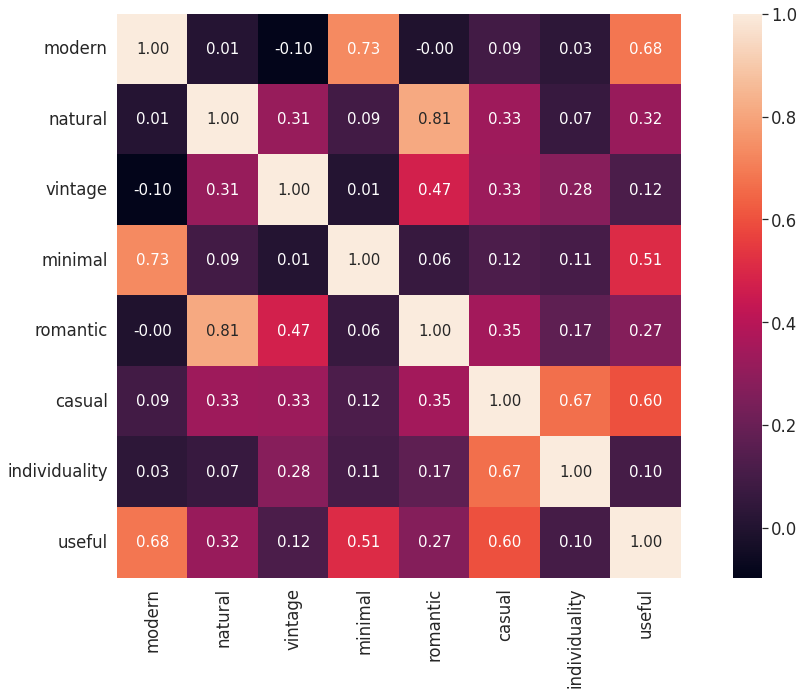

In [24]:
# moodss = ['minimal','romantic','casual','individuality','useful','modern','natural','vintage']
# corr1 = mbti_df.loc[:, 'like':'mix']
# corr2 = mbti_df.loc[:, 'ES':'TP']
# corr_df = pd.concat([corr1, corr2], axis=1)
# corr_df = personal.loc[:,'minimal':'vintage']
corr_df = personal
corr = corr_df.corr(method='pearson')
show_cols = corr_df.columns

# plt.rc('font', family='AppleGothic')
plt.rcParams['font.family'] = 'AppleGothic'
sns.set(font_scale=1.5)
plt.figure(figsize=(15,10))
hm = sns.heatmap(corr.values,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size':15},
                 yticklabels=show_cols,
                 xticklabels=show_cols)
plt.tight_layout()
plt.show()

In [ ]:

# minimal -> useful, modern + minimal 평균
# natural -> romantic, + natural 평균
# individuality -> individuality, casual 평균
# vintage -> vintage 


In [51]:
minimal =  personal['minimal'].tolist()
natural = personal['natural'].tolist()
individuality = personal['individuality'].tolist()
vintage = personal['vintage'].tolist()
modern = personal['modern'].tolist()
romantic = personal['romantic'].tolist()
casual = personal['casual'].tolist()
useful = personal['useful'].tolist()

score = pd.DataFrame({'minimal':minimal,'natural':natural,'individuality':individuality,'vintage':vintage,'modern':modern,'romantic':romantic,'casual':casual,'useful':useful})
scoreT = score.T
scoreT

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573
minimal,5.0,4.0,4.0,5.0,4.5,3.5,3.5,4.5,5.0,5.0,3.5,3.0,4.5,5.0,4.0,4.5,4.5,4.0,3.0,4.0,2.5,5.0,4.0,5.0,3.5,4.0,4.0,4.0,4.5,4.0,5.0,4.5,3.5,4.0,5.0,5.0,5.0,4.5,4.0,3.0,5.0,3.5,4.0,4.5,4.5,5.0,5.0,4.0,4.0,5.0,4.5,4.0,5.0,4.0,3.5,4.5,5.0,4.5,4.0,4.5,3.5,5.0,3.5,4.0,4.0,4.5,4.0,3.5,4.0,1.5,5.0,4.5,4.0,4.0,4.5,5.0,4.0,4.0,4.0,3.0,4.5,4.0,5.0,4.0,4.5,3.5,4.0,3.5,5.0,4.0,4.5,5.0,5.0,4.5,5.0,5.0,4.5,3.5,3.5,4.0,3.5,4.5,3.5,3.0,4.0,4.0,4.5,5.0,4.5,4.0,5.0,4.5,2.0,4.0,4.5,3.5,3.5,3.5,4.0,3.5,3.5,3.5,4.0,5.0,4.5,4.5,4.0,3.5,4.5,4.5,3.0,3.5,4.0,3.5,4.5,4.0,4.5,5.0,4.5,5.0,3.5,3.5,2.0,4.5,3.5,4.5,4.0,4.5,4.0,4.0,5.0,4.5,4.5,5.0,4.5,5.0,4.5,5.0,4.5,5.0,4.5,3.5,5.0,4.5,4.0,5.0,4.5,4.5,4.5,4.0,3.0,4.5,4.0,4.5,4.0,4.5,4.0,5.0,3.0,3.0,4.5,3.5,2.5,4.0,4.0,4.0,3.5,4.0,5.0,4.0,2.5,4.5,4.0,4.0,5.0,2.5,4.5,2.5,4.0,4.0,3.5,4.5,4.0,5.0,4.0,3.5,4.5,3.5,5.0,3.5,4.0,4.0,2.5,3.5,3.0,4.0,4.0,4.0,4.0,2.5,4.0,1.0,3.0,5.0,4.5,3.0,4.0,4.0,5.0,5.0,3.0,5.0,3.0,4.0,3.5,3.5,5.0,4.0,4.0,3.0,4.0,4.0,4.5,4.0,3.5,4.0,3.5,4.5,4.0,5.0,5.0,3.0,4.5,3.5,4.5,4.0,3.0,4.0,1.5,4.0,3.0,3.5,2.5,4.0,3.5,3.5,2.5,3.0,3.5,4.0,1.5,5.0,4.5,3.0,4.0,4.0,3.5,2.5,3.5,4.0,4.5,4.0,4.5,3.5,3.0,5.0,4.5,5.0,4.0,4.5,3.5,4.0,4.5,3.5,4.0,1.0,4.0,4.0,4.0,4.5,4.0,4.5,5.0,3.5,4.5,4.5,2.5,4.0,3.5,4.5,4.5,3.0,4.5,4.0,4.5,5.0,3.0,3.5,4.0,4.0,3.0,4.0,4.5,5.0,4.5,4.5,5.0,4.0,5.0,2.5,4.5,3.5,3.5,4.0,3.5,4.5,4.5,4.0,3.0,4.0,3.5,3.5,4.5,4.5,3.0,5.0,3.5,4.0,4.5,4.0,5.0,4.0,3.0,4.0,4.5,4.5,3.5,4.0,5.0,4.5,4.5,4.5,4.5,4.0,4.0,4.0,5.0,4.5,3.5,4.0,3.5,5.0,2.5,4.5,3.0,3.0,4.5,4.0,3.0,3.5,5.0,3.0,3.5,4.5,5.0,3.5,5.0,5.0,4.5,4.5,4.0,5.0,4.5,4.5,3.5,3.5,4.0,4.0,5.0,5.0,4.0,4.0,4.0,4.5,3.5,3.5,4.5,4.0,4.5,4.0,4.5,4.0,5.0,3.5,4.5,4.5,4.0,5.0,4.0,5.0,4.5,3.5,4.0,4.5,5.0,5.0,4.0,4.5,5.0,4.5,5.0,5.0,5.0,4.5,3.5,4.0,4.0,3.5,3.5,3.5,4.0,4.0,5.0,4.5,4.0,4.5,5.0,5.0,5.0,4.5,4.5,4

In [25]:
minimal = []
natural = []
individuality = []
vintage = personal['vintage'].tolist()
for i in range(len(personal)):
    minimal.append((personal['useful'][i] + personal['modern'][i] + personal['minimal'][i])/3)
for i in range(len(personal)):
    natural.append((personal['natural'][i] + personal['romantic'][i])/2)
for i in range(len(personal)):
    individuality.append((personal['individuality'][i] + personal['casual'][i])/2)
score = pd.DataFrame({'minimal':minimal,'natural':natural,'individuality':individuality,'vintage':vintage})
scoreT = score.T
scoreT

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573
minimal,4.666667,4.50,4.50,4.666667,4.5,4.333333,3.833333,4.666667,4.333333,4.50,3.833333,3.666667,3.833333,4.833333,3.833333,4.00,4.333333,3.5,3.166667,4.166667,2.0,4.833333,3.50,4.833333,3.333333,4.333333,4.0,4.00,4.00,4.666667,4.333333,4.333333,3.833333,4.00,5.0,4.666667,4.50,4.166667,4.00,3.00,4.666667,4.00,4.00,4.666667,3.833333,4.833333,5.0,3.50,3.00,5.00,4.333333,4.666667,4.333333,4.5,3.666667,4.5,4.666667,3.666667,4.00,4.50,3.833333,4.833333,3.50,3.50,3.333333,4.50,4.00,3.00,3.666667,1.833333,4.50,4.666667,4.00,4.00,4.50,5.0,4.0,4.00,4.00,3.333333,4.166667,4.00,4.333333,4.00,4.833333,3.666667,4.0,3.00,4.666667,4.50,4.666667,4.833333,4.833333,4.50,5.0,5.00,4.666667,4.50,3.50,4.0,4.5,4.333333,3.833333,4.166667,4.50,3.666667,4.00,4.666667,4.833333,3.833333,4.833333,4.666667,2.833333,4.166667,4.833333,3.833333,3.5,3.666667,4.0,3.00,4.333333,3.333333,4.333333,4.833333,4.0,4.833333,4.166667,4.00,4.666667,4.333333,3.666667,3.833333,4.333333,4.333333,4.666667,4.166667,4.666667,4.666667,4.5,4.833333,3.833333,4.50,2.166667,3.833333,4.00,4.5,3.666667,4.166667,3.5,3.833333,4.666667,4.666667,4.833333,5.0,4.833333,5.0,4.833333,5.0,4.50,4.833333,4.5,3.833333,4.833333,4.833333,4.50,5.0,4.5,4.833333,4.333333,3.50,3.50,4.333333,4.333333,4.333333,3.166667,4.5,3.833333,5.00,3.50,3.166667,3.833333,3.166667,2.833333,4.666667,3.666667,4.166667,3.333333,4.00,4.833333,4.0,2.833333,4.666667,3.50,4.666667,4.666667,3.50,3.833333,2.166667,3.666667,3.666667,3.50,3.833333,3.666667,4.333333,4.333333,3.166667,4.333333,3.333333,4.666667,3.333333,4.666667,3.666667,3.50,3.833333,3.666667,3.833333,4.666667,4.166667,4.00,2.50,3.833333,1.0,3.666667,5.00,4.333333,3.833333,4.00,4.0,4.833333,5.00,3.833333,4.833333,3.00,4.50,3.50,4.00,5.00,4.333333,4.166667,2.333333,4.166667,3.666667,4.00,3.833333,4.333333,3.50,3.166

In [52]:
best = []
for c in scoreT.columns:
    bestscore = max(scoreT.loc[:, c])
    best.append(list(scoreT.index[scoreT.loc[:, c] == bestscore])[0])

best

['minimal',
 'modern',
 'modern',
 'minimal',
 'modern',
 'modern',
 'natural',
 'modern',
 'minimal',
 'minimal',
 'natural',
 'natural',
 'minimal',
 'minimal',
 'minimal',
 'minimal',
 'modern',
 'individuality',
 'natural',
 'vintage',
 'individuality',
 'minimal',
 'natural',
 'minimal',
 'vintage',
 'modern',
 'modern',
 'minimal',
 'minimal',
 'natural',
 'minimal',
 'modern',
 'natural',
 'minimal',
 'minimal',
 'minimal',
 'minimal',
 'minimal',
 'minimal',
 'minimal',
 'minimal',
 'modern',
 'individuality',
 'modern',
 'minimal',
 'minimal',
 'minimal',
 'natural',
 'minimal',
 'minimal',
 'modern',
 'natural',
 'minimal',
 'modern',
 'modern',
 'modern',
 'minimal',
 'individuality',
 'minimal',
 'modern',
 'modern',
 'minimal',
 'modern',
 'casual',
 'minimal',
 'modern',
 'minimal',
 'natural',
 'minimal',
 'casual',
 'minimal',
 'modern',
 'minimal',
 'minimal',
 'modern',
 'minimal',
 'minimal',
 'minimal',
 'minimal',
 'natural',
 'natural',
 'natural',
 'minimal',
 'm

In [27]:

natural = []
individuality = []
vintage = personal['vintage'].tolist()

for i in range(len(personal)):
    natural.append((personal['natural'][i] + personal['romantic'][i])/2)
for i in range(len(personal)):
    individuality.append((personal['individuality'][i] + personal['casual'][i])/2)
score = pd.DataFrame({'natural':natural,'individuality':individuality,'vintage':vintage})
scoreT = score.T
scoreT

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573
natural,3.25,2.50,2.50,3.25,3.5,2.00,3.50,3.50,1.0,1.00,3.75,4.0,3.50,3.75,2.0,2.75,2.75,3.5,4.25,1.75,1.0,4.5,4.50,1.00,3.50,2.00,2.5,2.50,3.75,4.75,2.75,2.00,3.75,3.50,4.0,3.25,2.25,3.75,1.75,3.00,2.25,3.50,3.75,3.50,2.5,5.00,5.0,4.75,1.25,4.25,2.5,4.50,2.25,3.0,1.75,2.5,3.0,2.75,3.75,3.75,2.75,4.50,2.50,3.50,3.00,3.00,3.00,4.25,3.75,2.5,2.25,3.75,3.75,3.75,2.00,5.0,3.5,1.75,3.50,4.75,4.25,4.25,3.75,3.50,4.50,2.75,4.0,2.50,3.00,4.25,3.00,2.75,2.50,2.75,5.0,4.50,3.00,3.25,3.50,4.0,3.5,1.75,3.75,1.25,2.00,4.25,4.25,2.75,2.5,4.50,3.00,3.75,3.75,2.0,4.25,4.50,2.0,2.0,3.5,3.00,3.75,3.5,2.0,2.75,4.0,3.75,3.0,4.25,3.75,2.0,2.5,4.0,3.25,3.25,2.75,2.50,5.00,1.75,3.5,3.50,1.00,1.75,2.5,1.00,2.25,4.0,2.5,4.25,3.5,3.5,4.75,2.75,5.0,5.0,3.25,4.0,5.00,4.0,4.75,1.75,2.0,3.25,3.50,4.50,3.00,5.0,2.0,5.0,1.75,4.25,2.50,3.25,3.25,2.00,2.75,3.0,1.75,4.00,2.50,2.50,1.75,4.25,4.0,3.75,1.75,2.50,2.00,2.50,3.25,2.0,4.75,2.50,4.25,3.75,2.25,3.25,3.50,4.25,2.5,2.50,2.50,3.25,3.0,2.5,3.75,2.25,2.75,3.50,4.0,1.75,3.25,2.00,2.75,4.25,3.25,3.75,4.00,4.0,2.75,4.75,2.25,1.0,3.75,5.00,2.50,2.75,3.25,3.5,5.00,4.00,4.0,5.0,3.25,4.50,3.75,4.50,2.75,2.75,3.5,4.0,1.75,1.75,1.75,2.75,2.50,4.75,4.00,3.50,1.0,1.75,4.0,4.50,3.75,3.50,3.75,2.00,3.75,3.75,3.5,4.00,2.5,3.0,4.50,4.0,2.25,3.75,1.0,3.75,2.75,2.75,1.0,1.0,4.75,2.75,3.50,4.25,2.0,4.00,1.75,3.00,3.50,3.00,4.75,4.0,4.75,3.50,1.75,3.75,4.5,2.5,4.0,4.25,1.75,2.25,3.50,1.0,1.75,3.75,3.75,2.5,3.75,2.25,4.0,2.5,3.75,3.25,4.5,2.75,1.75,4.50,2.75,3.25,2.00,1.0,4.25,3.75,4.00,4.0,4.25,4.75,3.00,2.25,3.5,3.5,2.00,1.75,1.00,2.00,5.0,5.00,4.75,3.75,3.50,4.00,4.75,1.75,3.00,1.75,3.75,3.00,2.75,3.0,3.50,2.75,2.0,4.25,2.00,3.75,2.5,4.25,3.75,4.25,4.0,3.25,2.25,4.75,3.50,2.0,4.25,3.25,5.0,1.75,4.75,2.75,3.75,4.25,2.75,3.50,3.5,4.25,3.75,3.25,2.25,3.75,2.50,3.5,3.50,4.75,3.5,2.00,

In [28]:
best2 = []
for c in scoreT.columns:
    bestscore = max(scoreT.loc[:, c])
    best2.append(list(scoreT.index[scoreT.loc[:, c] == bestscore])[0])

best2

['natural',
 'individuality',
 'individuality',
 'natural',
 'natural',
 'natural',
 'natural',
 'natural',
 'natural',
 'individuality',
 'natural',
 'natural',
 'natural',
 'individuality',
 'natural',
 'individuality',
 'vintage',
 'individuality',
 'natural',
 'vintage',
 'individuality',
 'natural',
 'vintage',
 'individuality',
 'vintage',
 'individuality',
 'natural',
 'vintage',
 'natural',
 'natural',
 'vintage',
 'natural',
 'natural',
 'natural',
 'natural',
 'natural',
 'vintage',
 'natural',
 'individuality',
 'natural',
 'vintage',
 'vintage',
 'individuality',
 'individuality',
 'vintage',
 'natural',
 'natural',
 'natural',
 'vintage',
 'natural',
 'natural',
 'natural',
 'vintage',
 'natural',
 'vintage',
 'natural',
 'natural',
 'vintage',
 'natural',
 'vintage',
 'vintage',
 'natural',
 'natural',
 'individuality',
 'natural',
 'natural',
 'natural',
 'vintage',
 'natural',
 'individuality',
 'vintage',
 'vintage',
 'natural',
 'individuality',
 'individuality',
 'na

In [53]:
mbti_df['best'] = best
mbti_df

# mbti_df['best'] = best2
# mbti_df

,mbti,like,modern,nor_eur,natural,vintage,provence,classic,asia,unique,mix,모노톤,우드톤,웜톤,쿨톤,파스텔톤,남자,여자,10대,20대,30대,40대,50대,60대 이상,대학생,무직,미성년자,사업가,전업주부,직장인,프리랜서,real_mbti,real_EI,real_SN,real_FT,real_JP,E,I,N,S,F,T,J,P,ES,EN,IS,IN,EF,ET,IF,IT,EJ,EP,IJ,IP,SF,ST,NF,NT,SJ,SP,NJ,NP,FJ,FP,TJ,TP,best
0,INTP,1,5,3,3,3,4,3,5,2,3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,INTP,I,N,T,P,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,minimal
1,INFP,4,5,4,3,1,1,2,3,1,4,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,INFP,I,N,F,P,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,modern
2,ISTP,5,5,4,3,1,1,1,3,1,4,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,modern
3,INFJ,4,5,3,4,1,1,1,5,1,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,INFJ,I,N,F,J,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,minimal
4,ESTP,5,5,3,4,1,2,1,4,1,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,ESTP,E,S,T,P,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,modern
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,ISTP,2,5,3,2,1,3,2,2,3,2,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,modern
570,ISTP,1,4,4,4,4,3,4,3,2,3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,natural
571,INTP,3,4,3,3,4,4,5,5,2,2,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,INTP,I,N,T,P,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,minimal
572,ISTP,4,5,2,2,1,2,3,4,4,3,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,modern


In [223]:
mbti_df['best'].value_counts()

minimal          405
natural          106
vintage           42
individuality     21
Name: best, dtype: int64

In [54]:
features = pd.concat([mbti_df['like'], mbti_df.loc[:,'모노톤':'프리랜서'], mbti_df.loc[:,'ES':'TP']],axis=1)
target = mbti_df['best']

x_data = features
y_data = target


x_train, x_test, y_train, y_test = train_test_split(
        x_data, # 문제 데이터
        y_data, # 답 데이터
        test_size =0.2, # 비율
        shuffle = True, # 셔플링 여부
        random_state = 20 # 시드값
)

rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()
knn = KNeighborsClassifier()
svm_svc = SVC()

clf_list = [rf_clf, lr_clf, knn, svm_svc]

print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++',"의 교차검증")
def callKFold_all(clf_list):
        for clf in clf_list:
            scores = cross_val_score(clf, x_train, y_train, cv=5)
            for iter_count, accuracy in enumerate(scores):
                print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

            print(clf,"평균 정확도: {0:.4f}".format(np.mean(scores)))
        
first_result = callKFold_all(clf_list)
first_result

++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 의 교차검증
교차 검증 0 정확도: 0.3478
교차 검증 1 정확도: 0.3804
교차 검증 2 정확도: 0.3261
교차 검증 3 정확도: 0.3370
교차 검증 4 정확도: 0.4725
RandomForestClassifier(random_state=11) 평균 정확도: 0.3728
교차 검증 0 정확도: 0.4239
교차 검증 1 정확도: 0.3913
교차 검증 2 정확도: 0.3913
교차 검증 3 정확도: 0.3913
교차 검증 4 정확도: 0.4176
LogisticRegression() 평균 정확도: 0.4031
교차 검증 0 정확도: 0.3370
교차 검증 1 정확도: 0.4674
교차 검증 2 정확도: 0.3261
교차 검증 3 정확도: 0.3478
교차 검증 4 정확도: 0.4066
KNeighborsClassifier() 평균 정확도: 0.3770
교차 검증 0 정확도: 0.3913
교차 검증 1 정확도: 0.4674
교차 검증 2 정확도: 0.3478
교차 검증 3 정확도: 0.3043
교차 검증 4 정확도: 0.4615
SVC() 평균 정확도: 0.3945


In [55]:
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
accuracy_score(pred, y_test)

0.3826086956521739

In [56]:
svm_svc.fit(x_train, y_train)
pred = svm_svc.predict(x_test)
accuracy_score(pred, y_test)

0.3565217391304348

In [33]:
!pip install xgboost

In [57]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
import xgboost

In [58]:
xgb = XGBClassifier(tree_method='gpu_hist', random_state=156)
scores = cross_validate(xgb, x_train, y_train, return_train_score=True, n_jobs=-1)

In [59]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.6977179836512262 0.3901098901098901


In [60]:
xgb.fit(x_train,y_train)
preds = xgb.predict(x_test)
accuracy_score(y_test, preds)

0.4

In [95]:
xg_l = xgb.feature_importances_
xg_l

array([0.01652364, 0.09915945, 0.01105889, 0.0211901 , 0.02513464,
       0.01323505, 0.02480871, 0.        , 0.01795639, 0.02897705,
       0.01381795, 0.01121658, 0.01798101, 0.00569964, 0.01967578,
       0.01998469, 0.0126127 , 0.01163997, 0.01277908, 0.        ,
       0.01532707, 0.01905499, 0.01262599, 0.01139072, 0.01244603,
       0.04763006, 0.        , 0.0181062 , 0.01327784, 0.01634079,
       0.01258556, 0.00454654, 0.0246989 , 0.00558667, 0.02226882,
       0.01979914, 0.01486553, 0.        , 0.00955071, 0.00604739,
       0.01320793, 0.01325283, 0.02025106, 0.02114346, 0.01610781,
       0.01558074, 0.024288  , 0.02174333, 0.01661539, 0.01937734,
       0.02321466, 0.02877481, 0.01923247, 0.0205166 , 0.00818157,
       0.01694303, 0.00896141, 0.02300718], dtype=float32)

In [96]:
features

,like,모노톤,우드톤,웜톤,쿨톤,파스텔톤,남자,여자,10대,20대,30대,40대,50대,60대 이상,개인방,거실,기타s,드레스룸,부엌,서재,화장실,가격,기능,기타m,디자인,무드,브랜드,대학생,무직,미성년자,사업가,전업주부,직장인,프리랜서,ES,EN,IS,IN,EF,ET,IF,IT,EJ,EP,IJ,IP,SF,ST,NF,NT,SJ,SP,NJ,NP,FJ,FP,TJ,TP
0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
2,5,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
3,4,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
4,5,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,2,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
570,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
571,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
572,4,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1


In [267]:
######### minimal 제외
mbti_df['best'] = best2
mbti_df

,mbti,like,modern,nor_eur,natural,vintage,provence,classic,asia,unique,mix,모노톤,우드톤,웜톤,쿨톤,파스텔톤,남자,여자,10대,20대,30대,40대,50대,60대 이상,대학생,무직,미성년자,사업가,전업주부,직장인,프리랜서,real_mbti,real_EI,real_SN,real_FT,real_JP,E,I,N,S,F,T,J,P,ES,EN,IS,IN,EF,ET,IF,IT,EJ,EP,IJ,IP,SF,ST,NF,NT,SJ,SP,NJ,NP,FJ,FP,TJ,TP,best
0,INTP,1,5,3,3,3,4,3,5,2,3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,INTP,I,N,T,P,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,natural
1,INFP,4,5,4,3,1,1,2,3,1,4,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,INFP,I,N,F,P,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,individuality
2,ISTP,5,5,4,3,1,1,1,3,1,4,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,individuality
3,INFJ,4,5,3,4,1,1,1,5,1,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,INFJ,I,N,F,J,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,natural
4,ESTP,5,5,3,4,1,2,1,4,1,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,ESTP,E,S,T,P,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,natural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,ISTP,2,5,3,2,1,3,2,2,3,2,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,individuality
570,ISTP,1,4,4,4,4,3,4,3,2,3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,vintage
571,INTP,3,4,3,3,4,4,5,5,2,2,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,INTP,I,N,T,P,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,vintage
572,ISTP,4,5,2,2,1,2,3,4,4,3,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,ISTP,I,S,T,P,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,individuality


In [246]:
features

,like,모노톤,우드톤,웜톤,쿨톤,파스텔톤,남자,여자,10대,20대,30대,40대,50대,60대 이상,대학생,무직,미성년자,사업가,전업주부,직장인,프리랜서,대학생,무직,미성년자,사업가,전업주부,직장인,프리랜서,ES,EN,IS,IN,EF,ET,IF,IT,EJ,EP,IJ,IP,SF,ST,NF,NT,SJ,SP,NJ,NP,FJ,FP,TJ,TP
0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,4,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
2,5,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
3,4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
4,5,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,2,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
570,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
571,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
572,4,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1


In [309]:
features = pd.concat([mbti_df['like'], mbti_df.loc[:,'모노톤':'프리랜서'], job, mbti_df.loc[:,'ES':'TP']],axis=1)
target = mbti_df['best']

x_data = features
y_data = target


x_train, x_test, y_train, y_test = train_test_split(
        x_data, # 문제 데이터
        y_data, # 답 데이터
        test_size =0.2, # 비율
        shuffle = True, # 셔플링 여부
        random_state = 20 # 시드값
)

rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()
knn = KNeighborsClassifier()
svm_svc = SVC(probability=True)

clf_list = [rf_clf, lr_clf, knn, svm_svc]

print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++',"의 교차검증")
def callKFold_all(clf_list):
        for clf in clf_list:
            scores = cross_val_score(clf, x_train, y_train, cv=5)
            for iter_count, accuracy in enumerate(scores):
                print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

            print(clf,"평균 정확도: {0:.4f}".format(np.mean(scores)))
        
first_result = callKFold_all(clf_list)
first_result

++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 의 교차검증
교차 검증 0 정확도: 0.6848
교차 검증 1 정확도: 0.7174
교차 검증 2 정확도: 0.5978
교차 검증 3 정확도: 0.6304
교차 검증 4 정확도: 0.6703
RandomForestClassifier(random_state=11) 평균 정확도: 0.6602
교차 검증 0 정확도: 0.7391
교차 검증 1 정확도: 0.6848
교차 검증 2 정확도: 0.6739
교차 검증 3 정확도: 0.6522
교차 검증 4 정확도: 0.6923
LogisticRegression() 평균 정확도: 0.6885
교차 검증 0 정확도: 0.7174
교차 검증 1 정확도: 0.6848
교차 검증 2 정확도: 0.6630
교차 검증 3 정확도: 0.7174
교차 검증 4 정확도: 0.7143
KNeighborsClassifier() 평균 정확도: 0.6994
교차 검증 0 정확도: 0.7174
교차 검증 1 정확도: 0.7065
교차 검증 2 정확도: 0.7065
교차 검증 3 정확도: 0.7065
교차 검증 4 정확도: 0.7143
SVC(probability=True) 평균 정확도: 0.7102


In [307]:
xgb = XGBClassifier(tree_method='gpu-hist', random_state=42)
scores = cross_validate(xgb, x_train, y_train, return_train_score=True, n_jobs=-1)

In [308]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

nan nan


In [306]:
xgb.fit(x_train,y_train)
preds = xgb.predict(x_test)
accuracy_score(y_test, preds)

ValueError: ignored

In [117]:
from sklearn.ensemble import VotingClassifier


# 개별모델을 소프트보팅 기반의 앙상블 모델로 구현한 분류기
voting_model = VotingClassifier(estimators=[ ('RandomForest', rf_clf), ('SVC', svm_svc)], 
                              voting='soft')

# # 데이터를 훈련셋과 테스트셋으로 나누기
# X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# 보팅 분류기의 학습/예측/평가
voting_model.fit(x_train, y_train)
pred = voting_model.predict(x_test)
print('보팅 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn]
for classifier in classifiers:
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

보팅 분류기의 정확도:  0.6957
LogisticRegression 정확도: 0.7043
KNeighborsClassifier 정확도: 0.6696


In [118]:
#VOTING - SOFT
voting_model = VotingClassifier(estimators=[ ('LogisticRegression', lr_clf,), ('SVC',svm_svc), ('RandomForestClassifier',rf_clf)],
                                voting='soft')
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2,
                                                      random_state=156)

voting_model.fit(x_train, y_train)
pred = voting_model.predict(x_test)
print('보팅 Soft 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

vs = accuracy_score(y_test, pred)


보팅 Soft 분류기의 정확도:  0.6957


In [120]:
#VOTING - HARD
voting_model = VotingClassifier(estimators=[ ('LogisticRegression', lr_clf,), ('SVC',svm_svc), ('RandomForestClassifier',rf_clf)],
                                voting='hard')

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2,
                                                    random_state=156)
voting_model.fit(x_train, y_train)
pred = voting_model.predict(x_test)
print('보팅 Hard 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

vh = accuracy_score(y_test, pred)

보팅 Hard 분류기의 정확도:  0.6957


In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
def GS(clf, pa):  
    parameters = pa 
    grid_dclf = GridSearchCV(clf , param_grid=parameters , scoring='accuracy' , cv=5)
    grid_dclf.fit(x_train , y_train)

    print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
    print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
    best_dclf = grid_dclf.best_estimator_

    dpredictions = best_dclf.predict(x_test)
    accuracy = accuracy_score(y_test , dpredictions)
    print('테스트 세트에서의 ', clf, ' 정확도 : {0:.4f}'.format(accuracy))
    return clf, accuracy

In [72]:
def best_score():
    model = [rf_clf, lr_clf, svm_svc, knn]
    pa = [{'max_depth':[2,3,5,10],'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]},
          {'penalty':['l2', 'l1'],'C':[0.01, 0.1, 1, 1, 5, 10]},
          #  {'kernel': ['linear'],'gamma': [0.00001,0.0001, 0.001, 0.01, 0.1, 1],
          #   'C': [0.01, 0.1, 1, 10, 100, 1000]},
          {'kernel': ['linear'],
            'C': [0.01, 0.1, 1, 10, 100]},
           {'n_neighbors' : list(range(1,20))}]
     
    each_score = []
    
    for i in range(0,4):
        result = GS(model[i],pa[i])[1]
        each_score.append(result)
    
    max_score = np.max(each_score)
    idx =each_score.index(max_score)
    best_model = model[idx]
    print("=========")
    print("최적의 model은 ", best_model, '최대 accuracy는 ',max_score )


best_score()

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.4097
테스트 세트에서의  RandomForestClassifier(random_state=11)  정확도 : 0.3652
GridSearchCV 최적 하이퍼 파라미터 : {'C': 0.1, 'penalty': 'l2'}
GridSearchCV 최고 정확도: 0.4097
테스트 세트에서의  LogisticRegression()  정확도 : 0.4174
GridSearchCV 최적 하이퍼 파라미터 : {'C': 0.1, 'kernel': 'linear'}
GridSearchCV 최고 정확도: 0.3967
테스트 세트에서의  SVC()  정확도 : 0.3913
GridSearchCV 최적 하이퍼 파라미터 : {'n_neighbors': 19}
GridSearchCV 최고 정확도: 0.4163
테스트 세트에서의  KNeighborsClassifier()  정확도 : 0.3217
최적의 model은  LogisticRegression() 최대 accuracy는  0.41739130434782606


In [63]:
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
xgb_parameters ={'max_depth' : [3,4,5,6] , 'n_estimators': [12,24,32], 'learning_rate':[0.01, 0.1], 'gamma': [0.5, 1, 2], 'random_state':[99]}

In [64]:
grid_search_xgb = model_selection.GridSearchCV ( estimator = xgb, param_grid = xgb_parameters, scoring = 'recall', cv = 5 )
grid_search_xgb.fit( x_train, y_train )
best_xgb = grid_search_xgb.best_estimator_
best_xgb


XGBClassifier(gamma=0.5, learning_rate=0.01, n_estimators=12,
              objective='multi:softprob', random_state=99,
              tree_method='gpu_hist')

In [299]:
gb = GradientBoostingClassifier()
gb_parameters ={'max_depth' : [4,5,7] , 'n_estimators': [3,4, 5,10,30], 'learning_rate':[0.01, 0.1], 'random_state':[99]}

In [300]:
grid_search_gb = model_selection.GridSearchCV ( estimator = gb, param_grid = gb_parameters, scoring = 'recall', cv = 5 )
grid_search_gb.fit( x_train, y_train )
best_gb = grid_search_gb.best_estimator_
best_gb


GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=3,
                           random_state=99)

In [65]:
xgb = XGBClassifier(gamma=0.5, learning_rate=0.01, n_estimators=12,
              objective='multi:softprob', random_state=99,
              tree_method='gpu_hist')
scores = cross_validate(xgb, x_train, y_train, return_train_score=True, n_jobs=-1)

In [66]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.4999955573984126 0.4314859053989489


In [67]:
xgb.fit(x_train,y_train)
preds = xgb.predict(x_test)
accuracy_score(y_test, preds)

0.4

In [301]:
gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=3,
                           random_state=99)
scores = cross_validate(gb, x_train, y_train, return_train_score=True, n_jobs=-1)

In [302]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.7102401966591636 0.7102484472049688


In [303]:
gb.fit(x_train,y_train)
preds = gb.predict(x_test)
accuracy_score(y_test, preds)

0.6869565217391305